In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cargar el dataset
file_path = '/content/drive/MyDrive/UNI/Analitica_de_datos/Trabajos/dataset_huancavelica.xlsx'
df = pd.read_excel(file_path)

#Mostrar las 5 primeras filas
df.head()

,departamento,provincia,distrito,ubigeo,tmean,tmax,tmin,humr,ptot,ano,semana
0,HUANCAVELICA,ACOBAMBA,ACOBAMBA,90201,10.6,14.2,8.2,84.4,21.9,2024,1
1,HUANCAVELICA,ACOBAMBA,ACOBAMBA,90201,11.4,16.0,7.8,79.3,3.7,2024,2
2,HUANCAVELICA,ACOBAMBA,ACOBAMBA,90201,10.9,14.5,8.4,84.3,5.0,2024,3
3,HUANCAVELICA,ACOBAMBA,ACOBAMBA,90201,11.3,15.3,8.7,85.8,0.9,2024,4
4,HUANCAVELICA,ACOBAMBA,ACOBAMBA,90201,11.0,14.6,8.4,86.3,24.9,2024,5


### Descripción de variables

departamento:	Nombre del departamento del Perú (unidad territorial de nivel 1).
provincia:	Nombre de la provincia (unidad territorial de nivel 2) dentro del departamento.
distrito:	Nombre del distrito (unidad territorial de nivel 3) dentro de la provincia.
ubigeo:	Código numérico único (6 dígitos) asignado por el INEI que identifica de manera específica el distrito.
tmean:	Temperatura media (°C) durante la semana observada.
tmax:	Temperatura máxima (°C) registrada durante la semana observada.
tmin:	Temperatura mínima (°C) registrada durante la semana observada.
humr:	Humedad relativa promedio (%) registrada durante la semana observada.
ptot:	Precipitación total (mm) acumulada durante la semana observada.
ano:	Año de observación (formato: YYYY).
semana:	Semana del año en la que se registraron los datos (valor entero de 1 a 52 o 53).

In [4]:
# Mostrar las columnas del dataset
print("Columnas del dataset:")
print(df.columns)

# Mostrar los valores nulos de cada columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Mostrar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(df.dtypes)

Columnas del dataset:
Index(['departamento', 'provincia', 'distrito', 'ubigeo', 'tmean', 'tmax',
       'tmin', 'humr', 'ptot', 'ano', 'semana'],
      dtype='object')

Valores nulos por columna:
departamento    0
provincia       0
distrito        0
ubigeo          0
tmean           0
tmax            0
tmin            0
humr            0
ptot            0
ano             0
semana          0
dtype: int64

Tipos de datos por columna:
departamento     object
provincia        object
distrito         object
ubigeo            int64
tmean           float64
tmax            float64
tmin            float64
humr            float64
ptot            float64
ano               int64
semana            int64
dtype: object


In [5]:
# Mostrar estadísticas descriptivas para las variables numéricas
print("\nEstadísticas descriptivas para variables numéricas:")
print(df.describe())


Estadísticas descriptivas para variables numéricas:
             ubigeo         tmean          tmax          tmin          humr  \
count  47838.000000  47838.000000  47838.000000  47838.000000  47838.000000   
mean   90435.313725      8.493148     13.224052      4.717896     80.498748   
std      220.537793      2.925794      2.535926      3.599348      8.742380   
min    90101.000000     -0.400000      4.600000     -6.500000     38.000000   
25%    90207.000000      6.600000     11.500000      2.200000     76.100000   
50%    90412.500000      8.400000     13.100000      4.800000     82.400000   
75%    90614.000000     10.600000     15.000000      7.300000     86.700000   
max    90725.000000     17.200000     21.600000     14.600000     96.200000   

               ptot           ano        semana  
count  47838.000000  47838.000000  47838.000000  
mean       6.838271   2020.000000     26.556503  
std        9.005147      2.579262     15.042227  
min        0.000000   2016.000000  

In [6]:
# Contar los tipos de valores diferentes en una columna
def contar_valores_unicos(df, columna):
    print(f"\nValores únicos en la columna '{columna}':")
    print(df[columna].value_counts())

# Supongamos que tienes un DataFrame llamado 'df' y quieres analizar la columna 'NombreVariable'
contar_valores_unicos(df, 'departamento')
contar_valores_unicos(df, 'provincia')
contar_valores_unicos(df, 'distrito')


Valores únicos en la columna 'departamento':
departamento
HUANCAVELICA    47838
Name: count, dtype: int64

Valores únicos en la columna 'provincia':
provincia
TAYACAJA          11256
HUANCAVELICA       8442
HUAYTARA           7504
CASTROVIRREYNA     6097
ANGARAES           5628
CHURCAMPA          5159
ACOBAMBA           3752
Name: count, dtype: int64

Valores únicos en la columna 'distrito':
distrito
HUACHOCOLPA     938
ACOBAMBILLA     469
ACORIA          469
ACOSTAMBO       469
ACOBAMBA        469
               ... 
TANTARA         469
TICRAPO         469
TINTAY PUNCU    469
VILCA           469
YAULI           469
Name: count, Length: 101, dtype: int64


In [7]:
#CODIGO PARA GRAFICO DE BARRAS
def MakePlotBar(df, NombreVariable, titulo = "Poner un título", GuardarIMG=False):
  #Crear el gráfico y los ejes a manipular
  fig,ax = plt.subplots(figsize=(16,9))

  #Definir ejes
  x = df[NombreVariable].value_counts(ascending=True).index
  y = df[NombreVariable].value_counts(ascending=True)

  ax.barh(x,y,height=0.75,color="green")

  ax.set_title(titulo, fontsize=18, color="red",loc="right")

  ax.xaxis.set_tick_params(labelsize=8.5,labelcolor="black")
  ax.set_xticklabels(ax.get_xticks(),rotation=45,weight='bold',size=12)
  ax.yaxis.set_tick_params(labelsize=15,labelcolor="black")

  #Formato de miles a texto
  def MakeMiles(numero):
    if 1000<=numero<=9999:
      return str(numero)[0]+","+str(numero)[1:]
    elif 10000<=numero<=99999:
      return str(numero)[:2]+","+str(numero)[2:]
    else:
      return str(numero)

  #Asegurar que el texto no se superponga con el gráfico de barras
  for i,v in enumerate(y):
      ax.text(v+1,i,f'{MakeMiles(v)}',color="blue")

  plt.tight_layout()

  #dar amplitud al grafico
  niveles_var={}
  for nivel in df[NombreVariable].unique():
    niveles_var[nivel] = df[df[NombreVariable]==nivel].shape[0]

  #convertir el diccionario en serie
  niveles_var_df = pd.Series(niveles_var)

  #agregar el maximo nivel de barra a cada limite
  LimiteX = niveles_var_df.sort_values(ascending=False)[0]
  plt.xlim(0,1.1*LimiteX)

  #guardar imagen
  if GuardarIMG==True:
    tituloIMG=titulo+ ".jpeg"
    plt.savefig(tituloIMG,dpi=300)

  #graficar
  plt.show()

<ipython-input-7-88760baeab5c>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(),rotation=45,weight='bold',size=12)
<ipython-input-7-88760baeab5c>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  LimiteX = niveles_var_df.sort_values(ascending=False)[0]


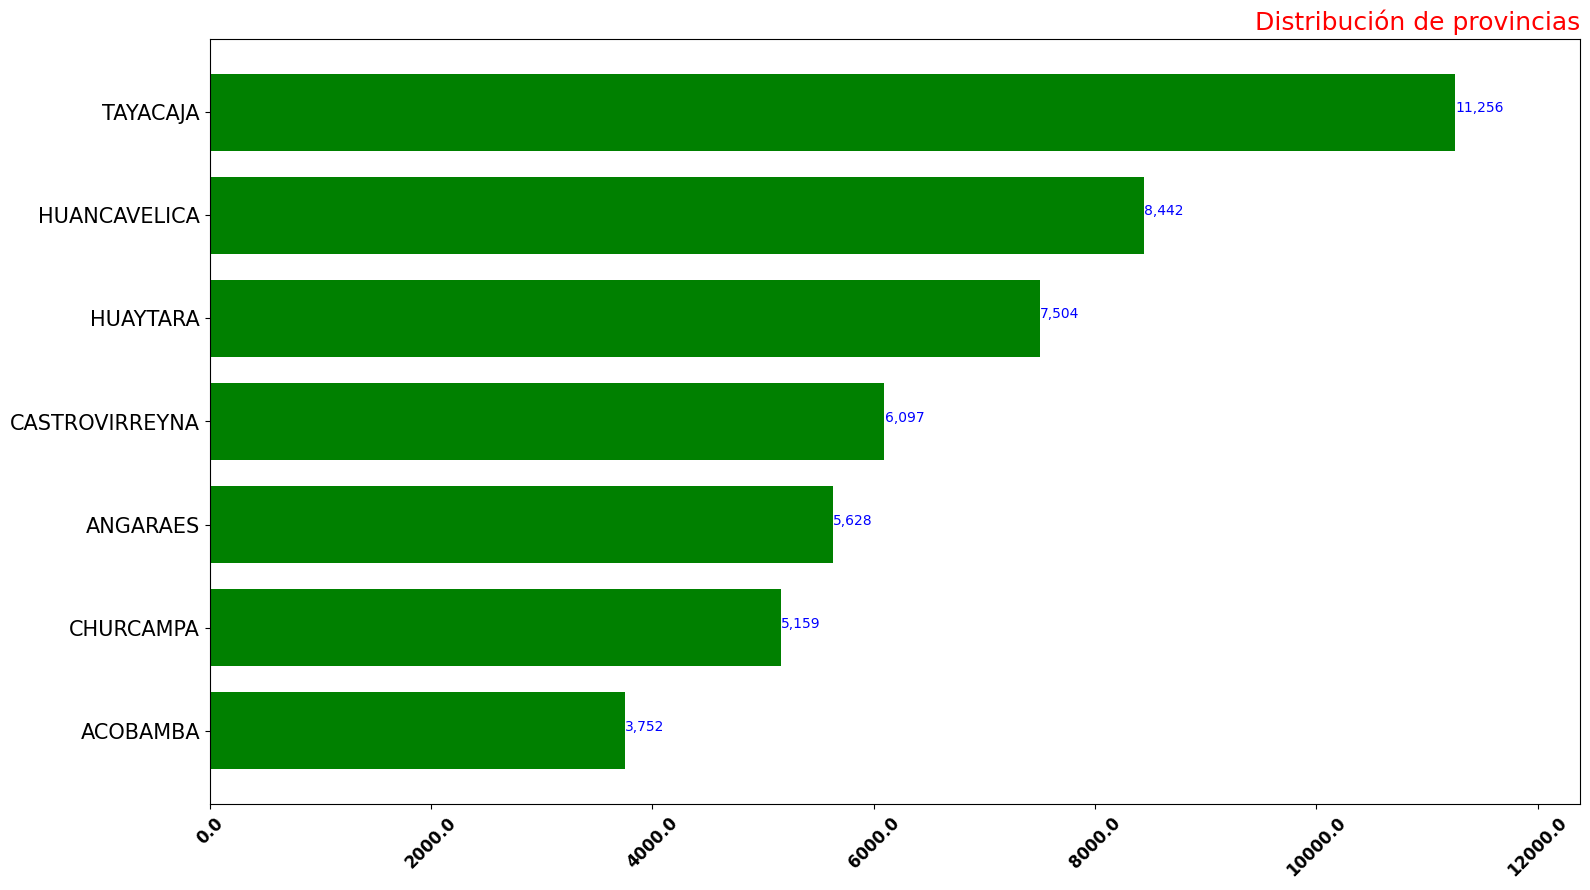

In [8]:
#Grafico de barras para la columna 'provincia'
MakePlotBar(df, 'provincia', titulo="Distribución de provincias", GuardarIMG=True)

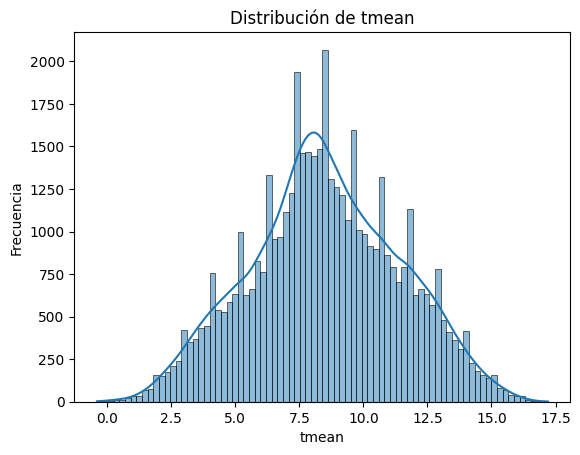

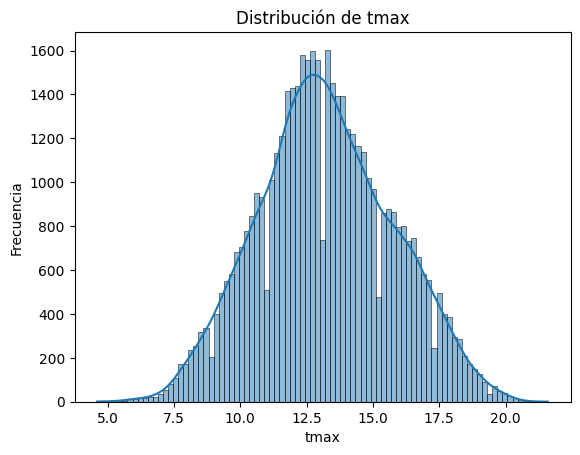

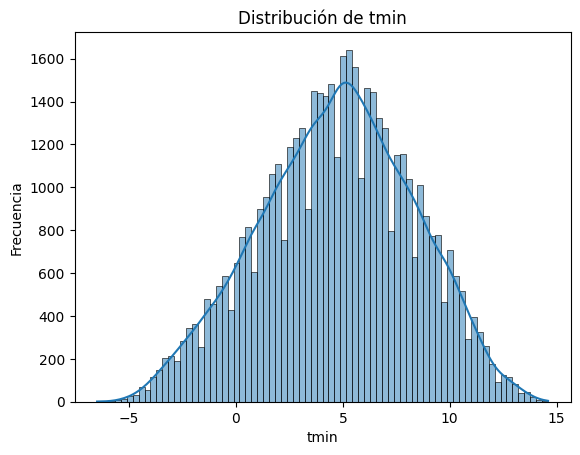

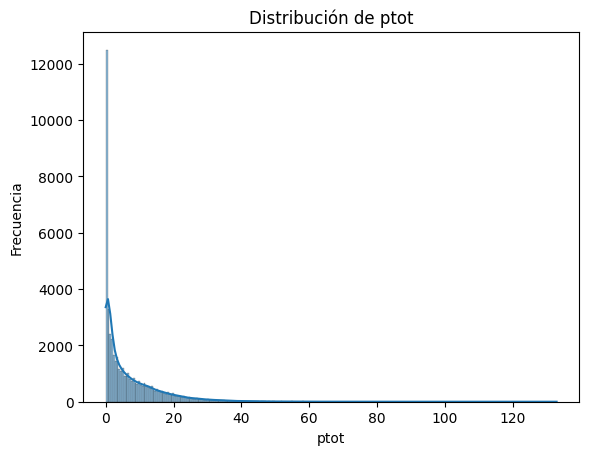

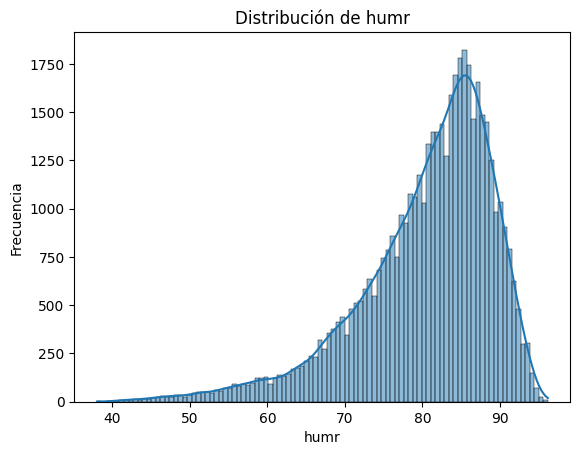

In [9]:
#histogramas de variables numéricas
for col in ['tmean', 'tmax', 'tmin', 'ptot', 'humr']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

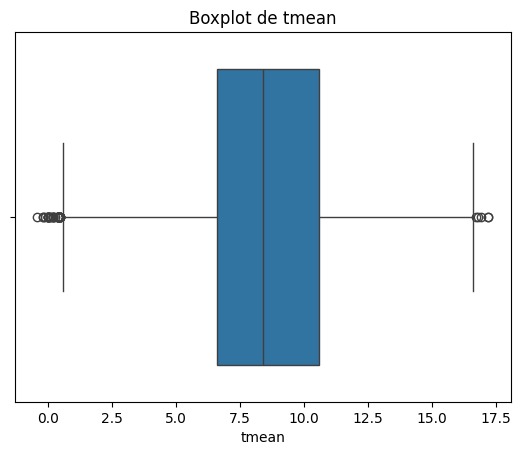

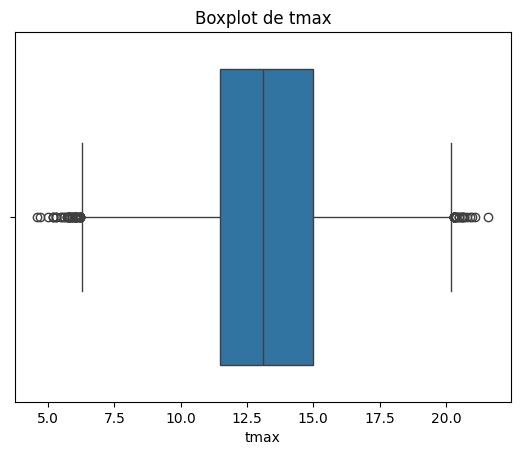

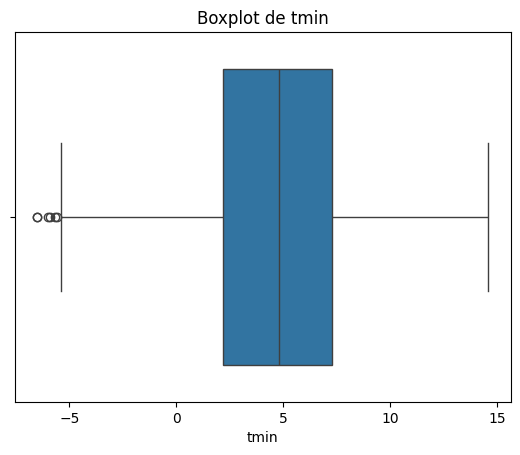

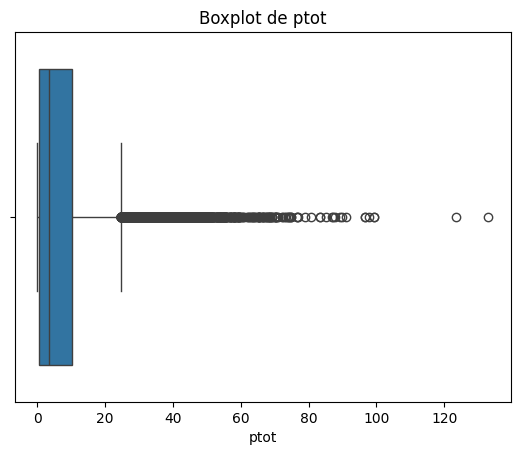

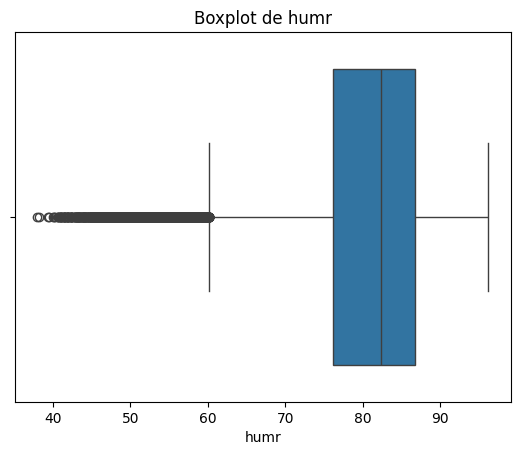

In [10]:
#Detección de outliers en variables numéricas con boxplots
for col in ['tmean', 'tmax', 'tmin', 'ptot', 'humr']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

Se observa que solo hay correlación significativa entre las variables de temperatura (lo cual tiene sentido). El resto de variables no tienen correlación significativa.

### Análisis de la fecha creando una nueva columna

In [12]:
df['fecha'] = pd.to_datetime(df['ano'].astype(str) + df['semana'].astype(str) + '1', format='%G%V%u')

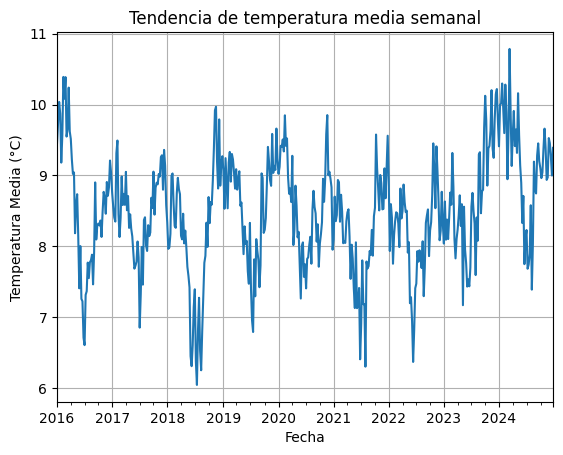

In [13]:
#tendencia de la temperatura media por semana
df.groupby('fecha')['tmean'].mean().plot()
plt.title('Tendencia de temperatura media semanal')
plt.ylabel('Temperatura Media (°C)')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

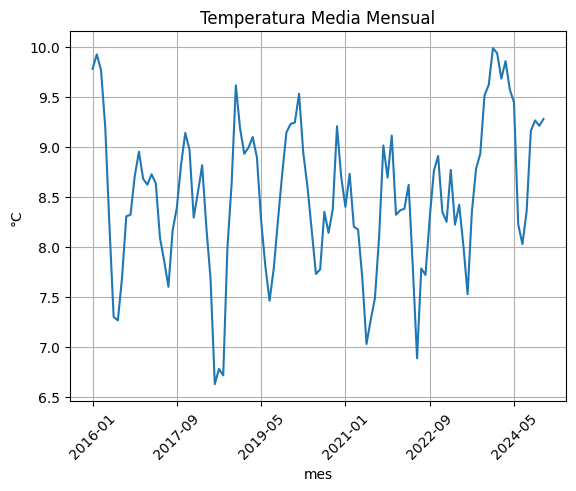

In [14]:
#Suavización de la serie de tiempo por mes
df['mes'] = df['fecha'].dt.to_period('M').astype(str)

df_mensual = df.groupby('mes')[['tmean', 'tmax', 'tmin', 'ptot', 'humr']].mean()

df_mensual['tmean'].plot()
plt.title('Temperatura Media Mensual')
plt.ylabel('°C')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


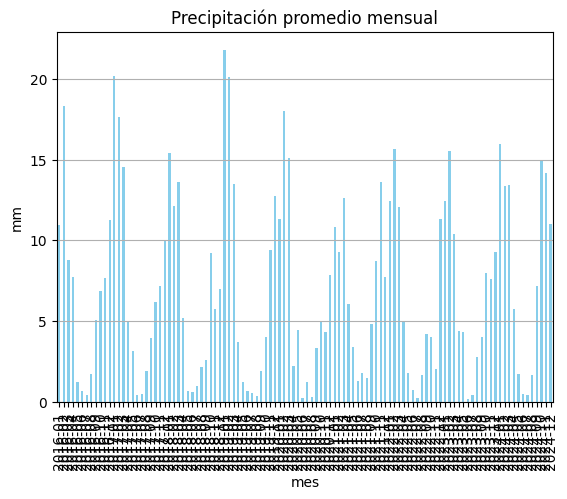

In [15]:
#Variacion de precipitacion por mes
df_mensual['ptot'].plot(kind='bar', color='skyblue')
plt.title('Precipitación promedio mensual')
plt.ylabel('mm')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


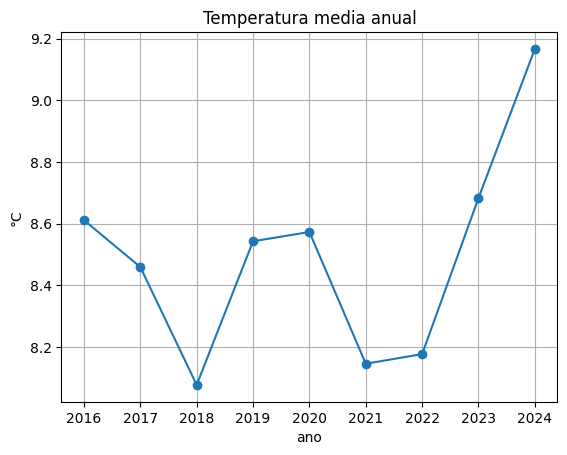

In [16]:
#Variacion anual de la temperatura media
df.groupby('ano')['tmean'].mean().plot(marker='o')
plt.title('Temperatura media anual')
plt.ylabel('°C')
plt.grid(True)
plt.show()


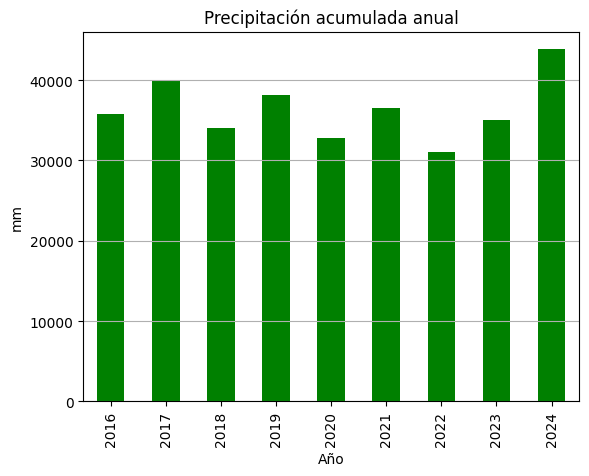

In [17]:
#Variacion anual de la precipitacion
df.groupby('ano')['ptot'].sum().plot(kind='bar', color='green')
plt.title('Precipitación acumulada anual')
plt.ylabel('mm')
plt.xlabel('Año')
plt.grid(axis='y')
plt.show()


Comparación de estaciones por año

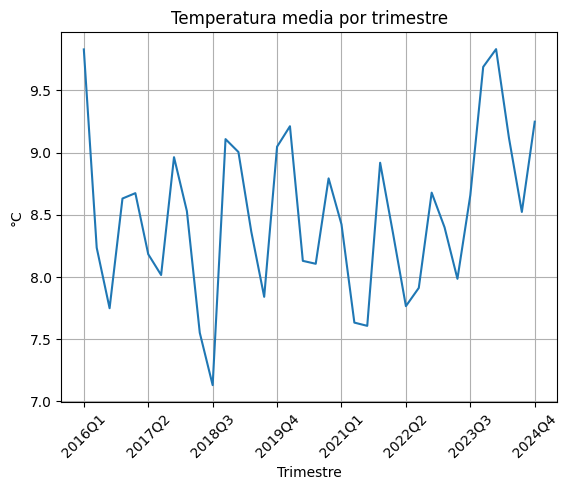

In [18]:
df['trimestre'] = df['fecha'].dt.to_period('Q').astype(str)

df.groupby('trimestre')['tmean'].mean().plot()
plt.title('Temperatura media por trimestre')
plt.ylabel('°C')
plt.xlabel('Trimestre')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [22]:
#Tratamiento de outliers para ptot y humr

#Por el metodo IQR
columnas_outliers = ['ptot','humr']
for columna in columnas_outliers:
  # Calcular los cuartiles Q1 y Q3
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)

  # Calcular el IQR
  IQR = Q3 - Q1
  # Definir los límites para identificar outliers
  LI = Q1 - 1.5 * IQR
  LS = Q3 + 1.5 * IQR

  D1 = df[columna].quantile(0.10)
  D9 = df[columna].quantile(0.90)

  # Reemplazar outliers por deciles
  df[columna] = df[columna].apply(lambda x: D1 if x < LI else D9 if x > LS else x)

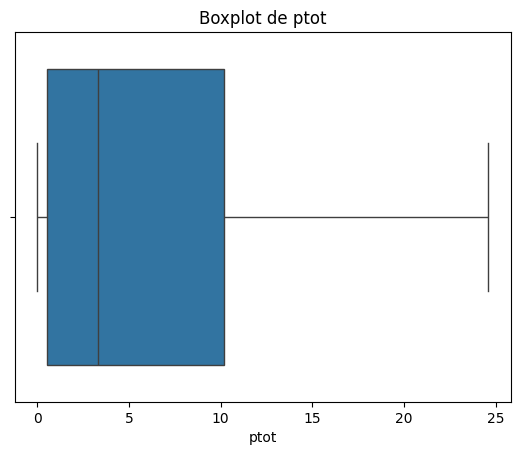

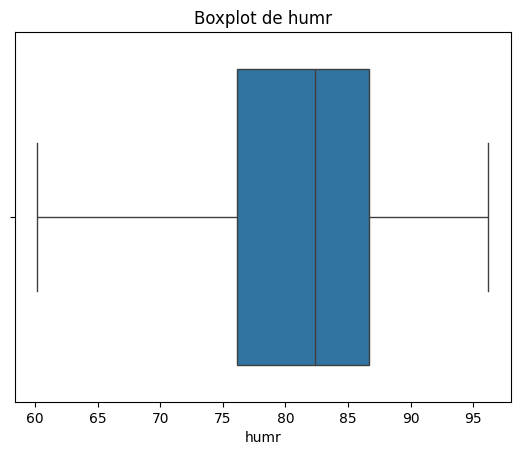

In [23]:
#Detección de outliers en variables numéricas con boxplots
for col in ['ptot', 'humr']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()